In [3]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_stock_data = tesla.history(period="max")
tesla_stock_data.reset_index(inplace=True)
tesla_stock_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [7]:
from selenium import webdriver
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

driver = webdriver.Chrome()
driver.get(url)

tables = pd.read_html(driver.page_source)
tesla_revenue = tables[1]   # the correct revenue table
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue = tesla_revenue.dropna()
driver.quit()

tesla_revenue.tail()


C:\Users\yogit\AppData\Local\Temp\ipykernel_10644\1812423176.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(driver.page_source)


,Date,Revenue
59,2010-09-30,$31
60,2010-06-30,$28
61,2010-03-31,$21
63,2009-09-30,$46
64,2009-06-30,$27


In [6]:
gme = yf.Ticker("GME")
gme_stock_data = gme.history(period="max")
gme_stock_data.reset_index(inplace=True)
gme_stock_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670625,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [8]:
gme = yf.Ticker("GME")
gme_stock_data = gme.history(period="max")
gme_stock_data.reset_index(inplace=True)

# Show last 5 rows
gme_stock_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
5910,2025-08-11 00:00:00-04:00,22.290001,22.809999,22.290001,22.410000,5212500,0.0,0.0
5911,2025-08-12 00:00:00-04:00,22.500000,22.950001,22.469999,22.930000,4854200,0.0,0.0
5912,2025-08-13 00:00:00-04:00,22.950001,23.209999,22.809999,23.020000,5349300,0.0,0.0
5913,2025-08-14 00:00:00-04:00,22.840000,22.910000,22.570000,22.889999,4780000,0.0,0.0
5914,2025-08-15 00:00:00-04:00,22.940001,23.020000,22.670000,22.940001,4940400,0.0,0.0


In [1]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# Setup Chrome in headless mode
options = webdriver.ChromeOptions()
options.add_argument("--headless")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
driver.get(url)

# Extract tables
tables = pd.read_html(driver.page_source)

# Tesla revenue is usually the 2nd table
tesla_revenue = tables[1]
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue = tesla_revenue.dropna()

driver.quit()

print(tesla_revenue.tail())


C:\Users\yogit\AppData\Local\Temp\ipykernel_11368\1109476779.py:16: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(driver.page_source)


          Date Revenue
59  2010-09-30     $31
60  2010-06-30     $28
61  2010-03-31     $21
63  2009-09-30     $46
64  2009-06-30     $27


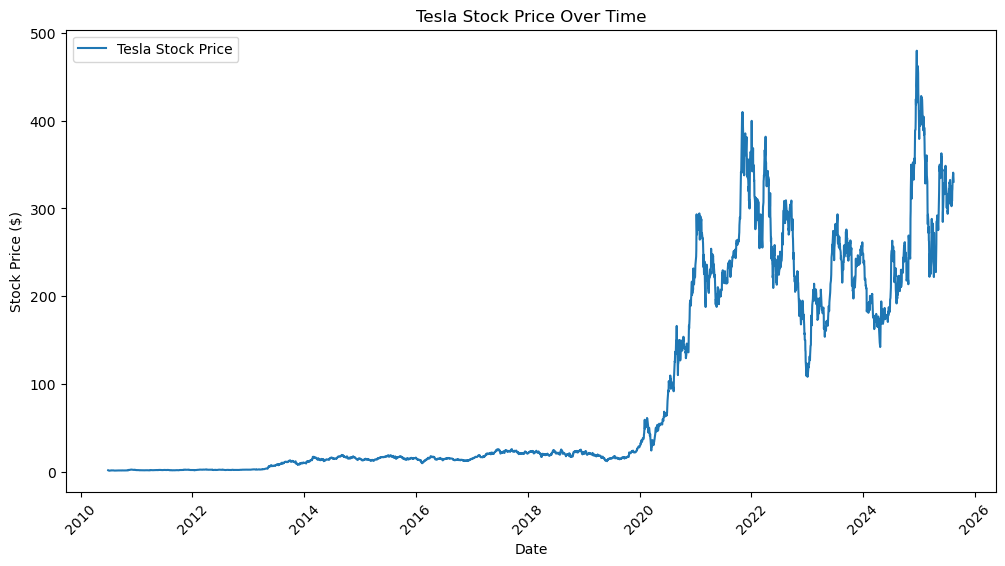

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(tesla_stock_data['Date'], tesla_stock_data['Close'], label="Tesla Stock Price")
plt.xticks(rotation=45)
plt.title("Tesla Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price ($)")
plt.legend()
plt.show()


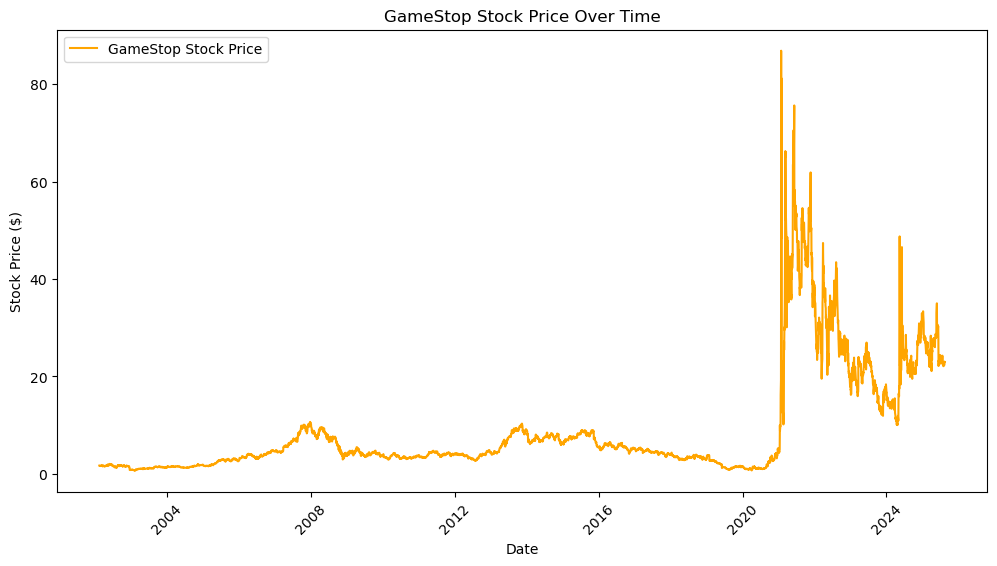

In [7]:
plt.figure(figsize=(12,6))
plt.plot(gme_stock_data['Date'], gme_stock_data['Close'], label="GameStop Stock Price", color="orange")
plt.xticks(rotation=45)
plt.title("GameStop Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price ($)")
plt.legend()
plt.show()
